# Shopify Marketing Data Science Project

This project is based on a challenge that was posted on Smarter.AI in February 2022. The following text was provided in the scope document for the challenge (with some edits for correct grammar).

'''
We are doing a hackathon with Shopify data, focused on marketing insights. You’ve been provided with two data sets from two different vendors. You should use those data sets to develop your models and upload to the platform. The method you develop should be able to function on various datasets, including ones that you haven’t seen before. 

___Data source:__ Standard Shopify Data. Shopify is a subscription-based software that allows anyone to set up an online store and sell their products. 

__Target:__ Any insights that will optimize marketing strategy.

__Available features:__ The data is a mix of Shopify 'Acquisition' and 'Behavior' reports and contains information about where website visitors come from (e.g. country or referrer) as well as checkouts and purchases. It is comprised of the following website visitor features:
* __page_type:__ Landing page
* __location_country:__ Country of origin
* __referrer_host:__ URL of referrer
* __referrer_source:__ Type of referral (Search, Direct, Email, Social)
* __referrer_name:__ Name of the referral source
* __ua_os:__ Device operating system
* __ua_form_factor:__ Device Type
* __hour:__ The timestamp of the visit (data is aggregated over 2h windows)
* __total_sessions:__ The number of sessions during the specified 2h window. A session is a website visit of 30min or less. If someone stays longer on the website, they create a new session.
* __total_checkouts:__ The number of sessions during the specified 2h window.
* __total_orders_placed:__ The number of sessions during the specified 2h window.
* __total_carts:__ The number of items put in carts during the specified 2h window
* __total_pageviews:__ The number of pages viewed during all sessions in the 2h window
* __total_conversion:__ The conversion rate (total_orders_placed / total_sessions) during the specified 2h window.
* __total_bounce_rate:__ The number of sessions resulting in no further actions (pageviews, carts, checkouts, purchase) during the specified 2h window.

If referrer information is unknown, this is either due to traffic being direct (URL typed in / bookmarked) or tracking being disabled by the website visitor.

__Rules:__
* It can include machine learning but doesn’t have to 
* Has to be written in Python 
* It has to work within Smarter.ai 
* Maximum submissions of three solutions per person 

__Judging parameters:__
MOST IMPORTANT: Does it work on a data set you have not seen?
We are evaluating who can find the deepest insight from Shopify data sets. 
Summary report maximum 500 words, why do you think this is useful, what does it do? 

__Performance:__
* Model accuracy
* Compute and time requirements 
* F1 Score
* Precision
* ROC Curve
* R2 coefficient 
* Mean squared error MSE
* Mean absolute error MAE 
* Time series 
* Mean average percentage error
* Symmetric mean average percentage error 

__Usability:__
* Interface presentation 
* Ease of use 
* Business value
* How easily will the customer understand what this will do for them and what they will get out of it?

__BONUS:__
* If you have machine learning it would be beneficial to have interpretability, why is the model predicting what it is predicting?
* If you have machine learning it would be beneficial to have uncertainty estimation: How certain is the model in its predictions?
'''

The deadline for the challenge has passed, but I think it's an interesting project to attempt nonetheless because it is uncommon to come across a toy dataset for marketing. I think it would be valuable to have a data science project with real business context in your portfolio, so let's dive in to see what we might be able to achieve.

# Data Wrangling

# Imports

These are just the basic packages, nothing special. Missingno can be used to visualize patterns of missing data (MAR vs. MCAR or NMAR). Bamboolib is awesome as a GUI for working with Dataframes and reduces the time I spend googling how to do stuff with Pandas - I highly recommend it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import bamboolib

Two CSVs were provided for the challenge, each containing data from Shopify sellers (probably fabricated). You can download the CSVs from my GitHub repository for this notebook.

# Seller 1

In [2]:
seller1 = pd.read_csv('../data/raw/shopify_data_seller1.csv')

In [3]:
seller1

,page_type,location_country,referrer_host,ua_os,hour,total_sessions,total_checkouts,total_orders_placed,total_carts,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Korea,l.facebook.com,iOS,2020-03-29 18:00:00,1,0,0,0,2,0.0,0.0,Mobile,Social,Facebook
1,Collection,Bhutan,l.facebook.com,Android,2019-07-20 12:00:00,1,0,0,0,1,0.0,1.0,Mobile,Social,Facebook
2,Homepage,NaN,Unknown,Android,2021-08-30 18:00:00,1,1,1,1,1,1.0,1.0,Mobile,NaN,NaN
3,Collection,Tanzania,instagram.com,Mac OS X,2019-10-06 15:00:00,1,0,0,0,1,0.0,1.0,Desktop,Social,Instagram
4,Homepage,Mongolia,Unknown,Linux,2020-06-26 08:00:00,1,0,0,0,1,0.0,1.0,Desktop,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Homepage,Uganda,Unknown,Windows,2021-08-14 00:00:00,1,0,0,0,1,0.0,1.0,Desktop,NaN,NaN
49996,Homepage,NaN,Unknown,Android,2020-11-27 06:00:00,1,0,0,0,1,0.0,1.0,Mobile,NaN,NaN
49997,Product,Bhutan,jones-shelton.com,Mac OS X,2019-07-31 07:00:00,1,0,0,0,1,0.0,1.0,Desktop,Unknown,NaN
49998,Product,Lithuania,Unknown,Linux,2021-03-23 15:00:00,1,0,0,0,1,0.0,1.0,Desktop,NaN,NaN


Seller 1 has 50,000 observations for website visits.

In [4]:
print(seller1[seller1.duplicated() == True])

      page_type location_country      referrer_host    ua_os  \
1558    Product            Spain  jones-shelton.com  Android   
1967    Product         Tanzania  jones-shelton.com  Android   
2107   Homepage              NaN            Unknown  Android   
2405    Product         Tanzania  jones-shelton.com  Android   
2816   Homepage              NaN            Unknown    Linux   
...         ...              ...                ...      ...   
49887   Product         Mongolia  jones-shelton.com  Windows   
49959   Product         Mongolia     m.facebook.com  Android   
49964   Product         Tanzania  jones-shelton.com  Android   
49972   Product         Mongolia            Unknown  Android   
49984   Product         Mongolia  jones-shelton.com  Android   

                      hour  total_sessions  total_checkouts  \
1558   2019-08-09 13:00:00               1                0   
1967   2019-08-18 18:00:00               1                0   
2107   2021-01-30 23:00:00               1

Inspecting the data reveals about 1377 rows of duplicates. Since the observations represent website traffic and the time intervals are on an hourly basis, it is entirely possible that these are not true duplicates, but rather multiple visits by the same visitor within the hour. For this reason, I chose to leave the duplicates as-is.

In [5]:
missing = pd.concat([seller1.isnull().sum().sort_values(ascending = False), 100 * seller1.isnull().mean().sort_values(ascending = False)], axis=1)
missing.columns=['count', '%']
print(missing)

                     count       %
referrer_name        40094  80.188
referrer_source      28917  57.834
location_country     13345  26.690
page_type                0   0.000
referrer_host            0   0.000
ua_os                    0   0.000
hour                     0   0.000
total_sessions           0   0.000
total_checkouts          0   0.000
total_orders_placed      0   0.000
total_carts              0   0.000
total_pageviews          0   0.000
total_conversion         0   0.000
total_bounce_rate        0   0.000
ua_form_factor           0   0.000


Counting the missing values reveals that referrer names are missing in 80% of observations, referrer source in 58%, and location_country in 27%. Furthermore, per the description provided in the challange, some of the records for referrer source are entered as "Unknown", suggesting that the true percentage of missing values is actually much higher.

The following matrix visualizes the patterns the gaps of missing data. Areas with missing data are not shaded. There doesn't appear to be any clear pattern in the gaps, but we can visualize the rows that have "Unknown" for referrer source and NA for referrer name.

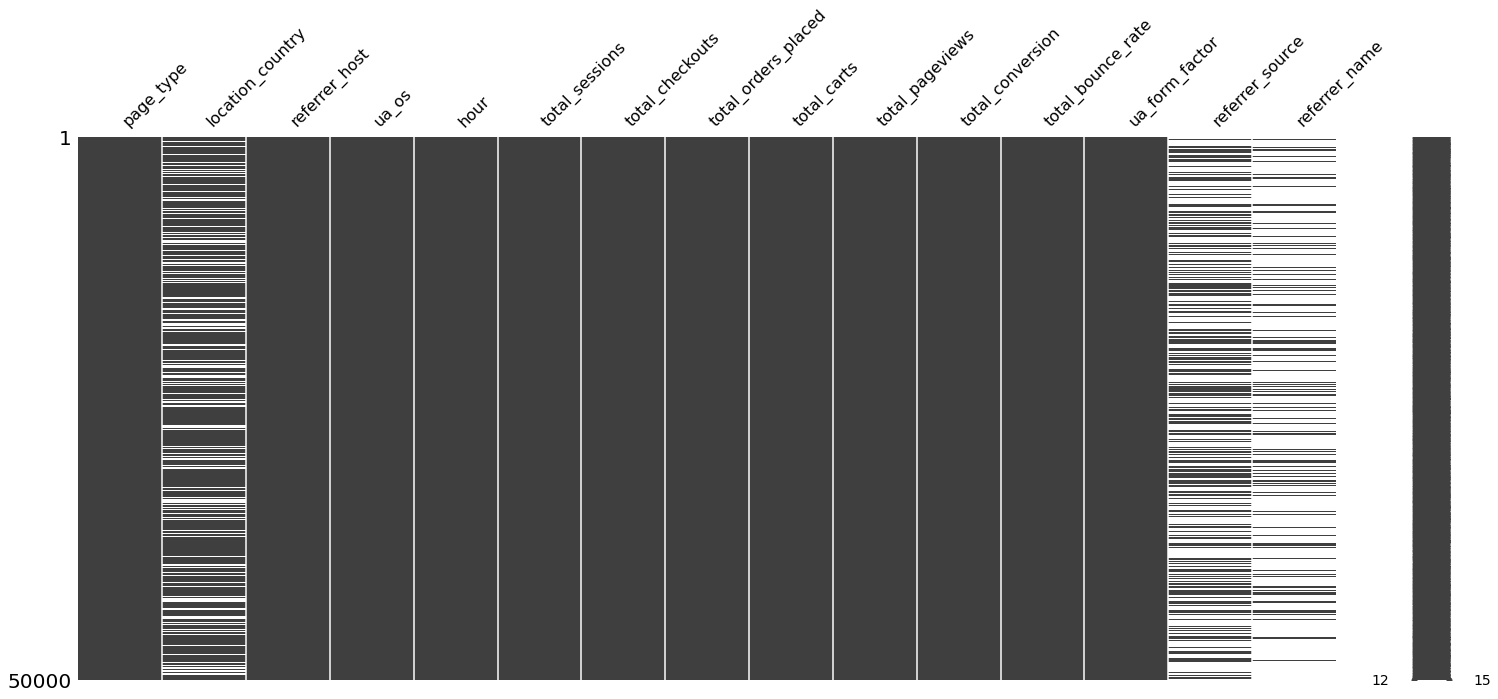

In [6]:
missing1 = msno.matrix(seller1)

I opted to replace the NA values for referrer name and referrer source with "Unknown" so that I can visualize the sources and names in the EDA phase of the project. This information can be very valuable in driving the focus of marketing campaigns, so I want to preserve that information for the time being. I am also going to leave all of the missing values for the location country. 27% is a significant piece of the pie, but this feature could also present valuable findings, and the feature may be salvagable with some nearest neighbor imputation. I will investigate that in the preprocessing phase.

In [7]:
seller1[['referrer_source', 'referrer_name']] = seller1[['referrer_source', 'referrer_name']].fillna('Unknown')

# Seller 2

The seller 2 dataset contains all of the same features as the seller 1 dataset, but with half the number of observations (25,000).

In [8]:
seller2 = pd.read_csv('../data/raw/shopify_data_seller2.csv')

In [9]:
seller2

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Homepage,Cape Verde,Unknown,Linux,2021-10-22 18:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
24996,Homepage,Sweden,www.google.com,iOS,2021-05-09 07:00:00,0,0,0,1,1,0.000000,1.0,Mobile,Search,Google
24997,Unknown,Dominica,Unknown,Android,2020-11-23 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
24998,Product,Bosnia and Herzegovina,myers.com,Mac OS X,2020-06-16 05:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN


In [10]:
print(seller2[seller2.duplicated() == True])

      page_type        location_country referrer_host     ua_os  \
3736   Homepage              Cape Verde       Unknown   Android   
4338   Homepage  Bosnia and Herzegovina       Unknown   Android   
6610   Homepage                   Gabon       Unknown       iOS   
6995   Homepage  Bosnia and Herzegovina       Unknown   Windows   
7088    Product  Bosnia and Herzegovina       Unknown     Linux   
...         ...                     ...           ...       ...   
24586  Homepage  Bosnia and Herzegovina       Unknown   Android   
24663  Homepage                Dominica       Unknown       iOS   
24861  Homepage  Bosnia and Herzegovina       Unknown   Android   
24875  Homepage              Cape Verde       Unknown  Mac OS X   
24924  Homepage  Bosnia and Herzegovina       Unknown       iOS   

                      hour  total_orders_placed  total_checkouts  total_carts  \
3736   2019-08-22 05:00:00                    0                0            0   
4338   2020-05-20 13:00:00       

As with the seller 1 dataset, I chose to leave the duplicate observations as-is.

In [11]:
missing = pd.concat([seller2.isnull().sum().sort_values(ascending = False), 100 * seller2.isnull().mean().sort_values(ascending = False)], axis=1)
missing.columns=['count', '%']
print(missing)

                     count       %
referrer_name        20028  80.112
referrer_source      14509  58.036
page_type                0   0.000
location_country         0   0.000
referrer_host            0   0.000
ua_os                    0   0.000
hour                     0   0.000
total_orders_placed      0   0.000
total_checkouts          0   0.000
total_carts              0   0.000
total_sessions           0   0.000
total_pageviews          0   0.000
total_conversion         0   0.000
total_bounce_rate        0   0.000
ua_form_factor           0   0.000


Interestingly the seller 2 dataset does not have any missing values for location country, and similar percentages of missing values for referrer name and referrer source. These will be given the same treatment as the missing values in the seller 1 dataset.

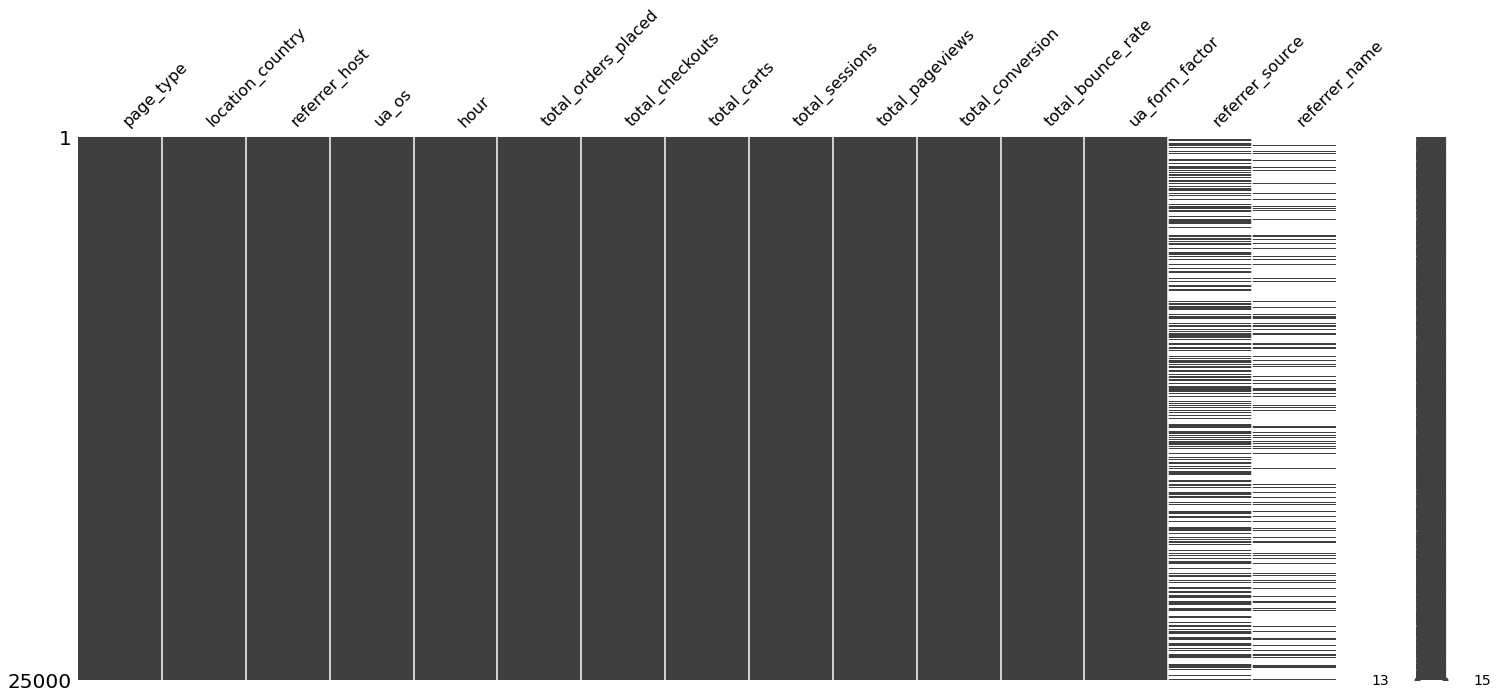

In [12]:
missing2 = msno.matrix(seller2)

In [13]:
seller2[['referrer_source', 'referrer_name']] = seller2[['referrer_source', 'referrer_name']].fillna('Unknown')

# Brainstorming

I think that this project and the scope set forth by the challenge are semi-realistic. The data is a little dirty, but very cool in my opinion. The challenge goal however is very uncool, but also about what you would expect. "Here's some data, do something cool with it so that we can say we use AI for a personalized marketing experience." The only real requirements defined by the challenge are that the deliverable(s) should:

1. Provide business value for optimizing marketing strategy
2. Should be interpretible with some quantification of uncertainty.
3. Should be generalizable to other datasets (presumably with the same features, just different values)

Number 3 implies that the deliverable would be in the form of a tool rather than an analysis specific to these two datasets. This could be a dashboard or automated pipeline for visualizations, such that you simply plug in new data and output fresh visuals of important metrics. The other option would be a model for predicting, classifying, clustering, or forecasting user activity. With the requirement of point number 2 and the relatively small size of the dataset, it would be reasonable to rule out deep learning solutions. With those restrictions in mind, here are some ideas that could be investigated in pursuit of "optimizing marketing strategy":

1. Clustering visitors to identify traits of distinct groups to market to. This approach could be used to intelligently identify groups that may be more likely to convert, or that may be ideal for a recapturing campaign.
2. Predicting conversion with a binary classification model. The model features can provide insight into the elements of the user experience that contribute to conversion, allowing marketers to focus on optimizing those elements (such as landing page). 
3. Forecasting website activity using the time series data available. This can be used to identify the ideal times to promote deals and sales
4. Predicting page views with a regression model. I'm unsure how feasible or valuable this idea is, but it might help identify visitors that just need a little push to convert.

These are just some spitball ideas, but from my perspective, marketing optimization is about finding all the details that will give you the best odds of putting the product in front of someone who is ready to buy, so I am more drawn towards ideas 1 and 2. I will likely incorporate elements of ideas 1, 2, and 3. The clustering can be done to engineer a new feature that might be valuable for classification, along with vectorized features representing the timestamp values. I will dig into this more in the preprocessing phase after I finish EDA.

In [15]:
# save the data to a new csv file
datapath = r'..\data\processed\seller1_cleaned.csv'

seller1.to_csv(datapath, index = False)

In [16]:
# save the data to a new csv file
datapath = r'..\data\processed\seller2_cleaned.csv'

seller2.to_csv(datapath, index = False)